In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
import os
import zipfile
# provide here the path to your local directory
local_dir_path = r'D:\vk\Project_visi_komputer' 
local_zip = 'DATASET.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('DATASET_temp')
zip_ref.close()

In [3]:
data_dir = os.path.join(local_dir_path, 'DATASET_temp\DATASET')
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

In [4]:
os.getcwd()

'D:\\vk\\Project_visi_komputer'

# DATA GENERATOR

In [5]:
def generator():
    i = 0
    while True:
        i += 1
        yield i

In [6]:
for item in generator():
    print(item)
    if item > 3:
        break

1
2
3
4


In [7]:
# setting some hyperparameters
NR_OF_IMAGES = 294
BATCH_SIZE = 20
STEPS_PER_EPOCH = int(NR_OF_IMAGES/BATCH_SIZE)
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT), batch_size=BATCH_SIZE, class_mode="categorical")

Found 22564 images belonging to 2 classes.


In [14]:
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT), batch_size=BATCH_SIZE, class_mode="categorical")

Found 208 images belonging to 2 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT), batch_size=BATCH_SIZE, class_mode="categorical")

Found 2513 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print('data example shape:', data_batch[0].shape)
    print('label shape:', labels_batch[0].shape)
    break

data batch shape: (20, 64, 64, 3)
labels batch shape: (20, 2)
data example shape: (64, 64, 3)
label shape: (2,)


The one_hot_encoded label of the plotted image is [0. 1.]


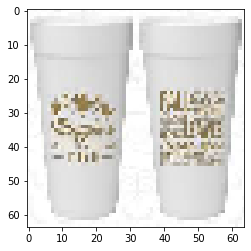

In [17]:
for data_batch, labels_batch in train_generator:
    plt.imshow(data_batch[0])
    print('The one_hot_encoded label of the plotted image is {}'.format(labels_batch[0]))
    break

# Convolutional Neural Network

In [18]:
from keras import models
from keras import layers

In [19]:
network = models.Sequential()
network.add(layers.Conv2D(16,(3,3), activation='relu', input_shape=(64,64,3)))
network.add(layers.MaxPool2D(2,2))
network.add(layers.Conv2D(32,(3,3), activation='relu'))
network.add(layers.MaxPool2D(2,2))
network.add(layers.Conv2D(64,(3,3), activation='relu'))
network.add(layers.MaxPool2D(2,2))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(3, activation='softmax'))

In [20]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

# Building & Training the network

In [21]:
network.compile(optimizer= 'RMSprop', loss= 'categorical_crossentropy',  metrics=['accuracy'])

In [22]:
history = network.fit_generator(train_generator, steps_per_epoch=20, epochs=2, validation_data=validation_generator, validation_steps=5)


Epoch 1/2


ValueError: Error when checking target: expected dense_2 to have shape (3,) but got array with shape (2,)